In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib notebook

In [2]:
df = pd.read_csv('Congregation_Data.csv',skiprows=4)
df1 = pd.read_csv('GDP_Data.csv')

In [3]:
#Religious Census Data State Wise for 2010
df.head()

,State,Population,PopRank,Adherents,AdhRank,Congregations,ConRank,Adherents %,Adh% Rank,Congregations Per 10K People,Con Per 10K Rank
0,Alabama,4779736,23,3007553,16,10514,11,62.9,3,22,6
1,Alaska,710231,47,240833,49,1246,45,33.9,48,18,12
2,Arizona,6392017,16,2379928,23,4673,30,37.2,43,7,44
3,Arkansas,2915918,32,1614357,32,6697,20,55.4,13,23,2
4,California,37253956,1,16765751,1,23558,2,45.0,31,6,50


In [4]:
# GDP Data is Provided Year Wise, State Wise and Industry Wise in Million Dollars
df1.head()

,ComponentId,ComponentName,FIPS,Region,GeoName,IndustryId,IndustryName,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,200,Gross Domestic Product by State (millions of c...,0.0,0.0,United States,101.0,All industry total,8270462,8727023,9286858,...,10572388,11067829,11774410,12539116,13289235,13936199,14193120,13834700,14416601,14981020
1,200,Gross Domestic Product by State (millions of c...,0.0,0.0,United States,102.0,Private industries,7271021,7694421,8199565,...,9289346,9706891,10345570,11037056,11709404,12268773,12437147,12018095,12558037,13097365
2,200,Gross Domestic Product by State (millions of c...,0.0,0.0,United States,103.0,"Agriculture, forestry, fishing, and hunting",108368,100315,92829,...,94405,115539,142712,127101,122468,144542,159375,139972,156984,177795
3,200,Gross Domestic Product by State (millions of c...,0.0,0.0,United States,104.0,Crop and animal production (Farms),87949,79217,71189,...,72304,92412,118254,102018,93050,114893,130451,113128,132610,(NA)
4,200,Gross Domestic Product by State (millions of c...,0.0,0.0,United States,105.0,"Forestry, fishing, and related activities",20419,21099,21640,...,22101,23127,24458,25084,29418,29649,28923,26844,24374,(NA)


In [5]:
# 158 is the industry code for "Professional, Scientific and Technical Services"

df1.drop(df1[df1['IndustryId'] != 158].index, inplace = True)
df.set_index('State',inplace=True)
df1.set_index('GeoName',inplace=True)
data = df[['Population','Congregations']].join(df1['2010'])
data.columns =['Population','Congregations','Tech_GDP']

In [6]:
data = data.astype(float)
data.dtypes

Population       float64
Congregations    float64
Tech_GDP         float64
dtype: object

In [7]:
data['Cong/Pop'] = data['Congregations']/data['Population']*1000000.0
data['GDP/Pop'] = data['Tech_GDP']/data['Population']*1000000.0
data.head()

,Population,Congregations,Tech_GDP,Cong/Pop,GDP/Pop
State,,,,,
Alabama,4779736.0,10514.0,11113.0,2199.703080,2325.023809
Alaska,710231.0,1246.0,2058.0,1754.358793,2897.648793
Arizona,6392017.0,4673.0,15153.0,731.068143,2370.613220
Arkansas,2915918.0,6697.0,4032.0,2296.703817,1382.754933
California,37253956.0,23558.0,171267.0,632.362372,4597.283574


In [8]:
# Removing Outliers that our more than 3 Standard Deviations away from the Mean

mean = data['Cong/Pop'].mean()
sd = data['Cong/Pop'].std()
data.drop(data[((data['Cong/Pop'] - mean)/sd > 3) | ((data['Cong/Pop'] - mean)/sd < -3)].index, inplace = True)

mean = data['GDP/Pop'].mean()
sd = data['GDP/Pop'].std()
data.drop(data[((data['GDP/Pop'] - mean)/sd > 3) | ((data['GDP/Pop'] - mean)/sd < -3)].index, inplace = True)
data.shape

(50, 5)

<IPython.core.display.Javascript object>


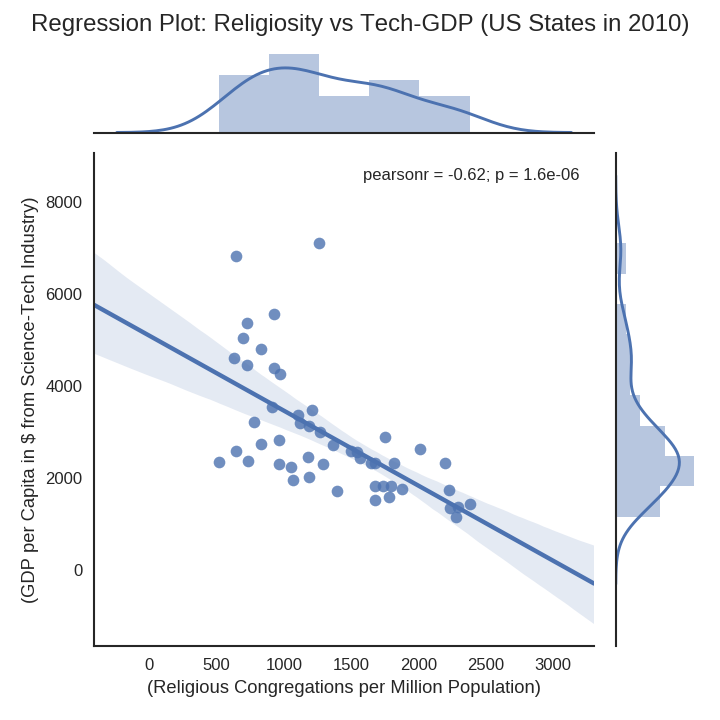

In [9]:
sns.set(style="white", color_codes=True)
ax = sns.jointplot(data['Cong/Pop'],data['GDP/Pop'], kind='reg')
ax.set_axis_labels("(Religious Congregations per Million Population)", "(GDP per Capita in $ from Science-Tech Industry)")
ax.fig.suptitle("Regression Plot: Religiosity vs Tech-GDP (US States in 2010)")
ax.fig.tight_layout()
ax.fig.subplots_adjust(top=0.93);